### K-Means Clustering

About: https://en.wikipedia.org/wiki/K-means_clustering<br/>
Data Set: https://archive.ics.uci.edu/ml/datasets/seeds<br/>

Description: try to cluster n samples into k clusters while minimizing inertia<br/>
Type: Unsupervised<br/>

The data consists of 7 grain measurements. The last column is the type.<br/>
Given that K-Means is an unsupervised algorithm, we don't use it for fitting the data.<br/>
<p>Here, we load the samples into a Pandas data frame, then get a numpy matrix out of the data frame exluding the labels.  We fit the data using different numbers of clusters and graph the inertia against the number of clusters.  We notice that inertia drops very little from 3 clusters to 4, so we pick 3 clusters.</p>
<p>Once we have our number of clusters, we fit our model and cross-tabulate the predictions against the actual classes.</p>
<p>We then try scaling the data before fitting/predicting (using a pipeline).  We cross-tabulate to see if scaling made the predictions better (scaling helps when the features vary greatly in size.</p>
<p>Finally, we plot a dendrogram (hierarchical clustering) using varieties for labels and use t-SNE to visualize the clusters in two dimensions even though we had 6 features</p>

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('sample_data/grains/seeds.csv', header=None)

In [34]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [35]:
df.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
0    210 non-null float64
1    210 non-null float64
2    210 non-null float64
3    210 non-null float64
4    210 non-null float64
5    210 non-null float64
6    210 non-null float64
7    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [38]:
samples = df.as_matrix()[:,:-1] # get a numpy array from the pandas DataFrame.  
                                # Exclude the last columnn which is the variety type

In [39]:
samples[0:10,:]

array([[ 15.26  ,  14.84  ,   0.871 ,   5.763 ,   3.312 ,   2.221 ,   5.22  ],
       [ 14.88  ,  14.57  ,   0.8811,   5.554 ,   3.333 ,   1.018 ,   4.956 ],
       [ 14.29  ,  14.09  ,   0.905 ,   5.291 ,   3.337 ,   2.699 ,   4.825 ],
       [ 13.84  ,  13.94  ,   0.8955,   5.324 ,   3.379 ,   2.259 ,   4.805 ],
       [ 16.14  ,  14.99  ,   0.9034,   5.658 ,   3.562 ,   1.355 ,   5.175 ],
       [ 14.38  ,  14.21  ,   0.8951,   5.386 ,   3.312 ,   2.462 ,   4.956 ],
       [ 14.69  ,  14.49  ,   0.8799,   5.563 ,   3.259 ,   3.586 ,   5.219 ],
       [ 14.11  ,  14.1   ,   0.8911,   5.42  ,   3.302 ,   2.7   ,   5.    ],
       [ 16.63  ,  15.46  ,   0.8747,   6.053 ,   3.465 ,   2.04  ,   5.877 ],
       [ 16.44  ,  15.25  ,   0.888 ,   5.884 ,   3.505 ,   1.969 ,   5.533 ]])

In [40]:
def seed_name(row):
    if row == 1:
        return 'Kama wheat'
    elif row == 2:
        return 'Rosa wheat'
    else:
        return 'Canadian wheat'

In [41]:
# Let's get the variety types both as numbers and as categorical attributes
variety_numbers = df[7].values

varieties = df[7].apply(seed_name).tolist()
varieties[0:5]

['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat']

In [42]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Find the best number of clusters

Note: Inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters is ideal

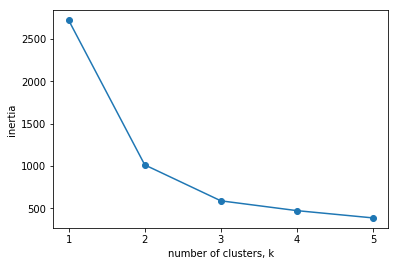

In [43]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Evaluate the grain clustering

In [44]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples) # same as calling fit() followed by predict()
# create a DataFrame with labels and varieties as columns
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# create cross tab to count the number of times each grain variety coincides with each sample
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0


## Scaling

Scaling can make the predictions more accurate, especially for data sets where the features vary greatly in size

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       4          62           5
1                      66           6           0
2                       0           2          65


## Hierarchical clustering (Dendrogram)

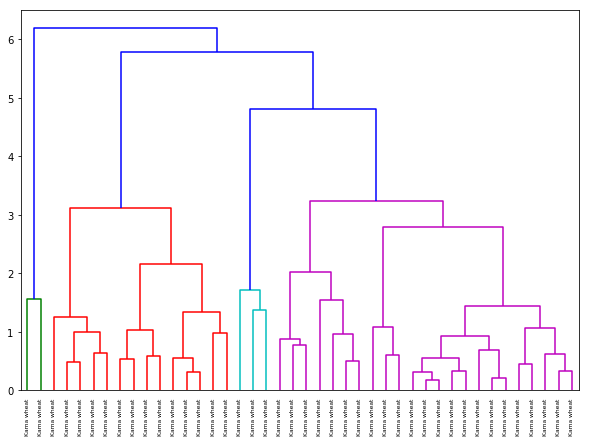

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# calculate the linkage
mergings = linkage(samples[0:42], method='complete')

# plot the dendrogram using varieties as labels
plt.figure(figsize=(10,7))
dendrogram(mergings, labels=varieties[0:42], leaf_rotation=90, leaf_font_size=6)
plt.show()

## t-SNE visualization

Visualizing high dimensional data in 2 dimensions

Each grain has a bunch of features.  How do you cluster them in 2 dimensions? The answer is T-SNE

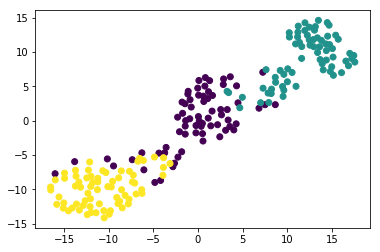

In [47]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=200)

tsne_features = model.fit_transform(samples)

xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

# scatter plot coloring by variety numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()
